In [1]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import Hour, Minute
from pandas.tseries.offsets import Day, MonthEnd
from pandas.tseries.offsets import Hour

In [2]:

df1 = pd.read_csv('Naive_errors.csv', index_col=0)
df2 = pd.read_csv('acfARIMA_errors_final.csv',index_col=0)
df3 = pd.read_csv('autoARIMA_errors_final.csv',index_col=0)
df4 = pd.read_csv('LSTM_errors_not_scaled.csv',index_col=0)
df5 = pd.read_csv('GBDT_errors.csv',index_col=0)
df6 = pd.read_csv('LSTM_errors_not_scaled_rand.csv',index_col=0)
df7 = pd.read_csv('GBDT_errors_random.csv',index_col=0)
LSTM_season3 = pd.read_csv('LSTM_errors_not_scaled_s3.csv',index_col=0)

In [3]:
def computeMSEevery5(df):
    
    Result = []
    for col in df.columns:
        
        Result.append(df[col].mean())
        
    Result
    
    return Result
        

In [4]:
def computeSTDevery5(df):
    
    Result = []
    for col in df.columns:
        
        Result.append(df[col].std())
        
    Result
    
    return Result

In [5]:
Naive = computeMSEevery5(df1)
acf = computeMSEevery5(df2)
auto = computeMSEevery5(df3)
LSTM = computeMSEevery5(df4)
GBDT = computeMSEevery5(df5)
LSTM_rand = computeMSEevery5(df6)
GBDT_rand = computeMSEevery5(df7)
LSTM_s3 = computeMSEevery5(LSTM_season3)

In [6]:
print(Naive)

[48.088347242558996, 38.10633202973118, 38.10633202973118, 40.141598752383516]


In [7]:
print(acf)

[1646.1748809558792, 905.4377994785285, 1971.179741634324, 3248.30223980831]


In [8]:
print(auto)

[1646.1748809558792, 905.4377994785285, 1933.42318427016, 3248.30223980831]


In [9]:
print(LSTM)

[88.51402697299659, 74.94635905205385, 636.9147469041675, 109.81993027769832]


In [10]:
print(LSTM_s3)

[69.62808531385495]


In [11]:
print(GBDT)

[46.740433641323946, 36.01733408817839, 37.183585551257025, 97.96629890345302]


In [12]:
print(LSTM_rand)

[42.23246705133936, 35.72557782746271, 56.67415690354918, 40.20801413764954]


In [13]:
print(GBDT_rand)

[47.27506201290879, 36.14967425241896, 44.54255567079229, 55.54787868440259]


In [14]:
LSTM[2] = LSTM_s3[0]

In [15]:
d = {'Naive':Naive,'ARIMA ACF':acf,'AUTO-ARIMA':auto,'LSTM':LSTM,'LSTM Random search':LSTM_rand,'GBDT':GBDT,'GBDT Random search':GBDT_rand}

df_MSEs = pd.DataFrame({k:pd.Series(v) for k,v in d.items()})
df_MSEs['seasons'] = ['season 1', 'season 2', 'season 3', 'season 4']
df_MSEs = df_MSEs.set_index('seasons')

In [16]:
df_MSEs.transpose()

seasons,season 1,season 2,season 3,season 4
Naive,48.088347,38.106332,38.106332,40.141599
ARIMA ACF,1646.174881,905.437799,1971.179742,3248.302240
AUTO-ARIMA,1646.174881,905.437799,1933.423184,3248.302240
LSTM,88.514027,74.946359,69.628085,109.819930
LSTM Random search,42.232467,35.725578,56.674157,40.208014
GBDT,46.740434,36.017334,37.183586,97.966299
GBDT Random search,47.275062,36.149674,44.542556,55.547879


In [17]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd


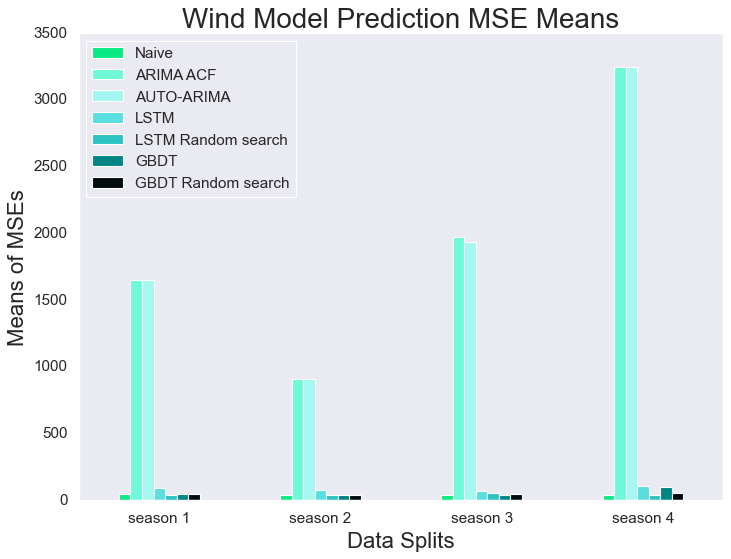

In [18]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10.4,7.3)},font_scale=1.25)
sns.set_style("dark")
df_MSEs.plot(kind="bar", color = ['#09EA82','#6FF9D8','#A5F7F2','#59DFDF','#2DC3C3','#008585','#010C0C'])
plt.xticks(rotation=0,horizontalalignment="center")
plt.title('Wind Model Prediction MSE Means',fontsize=25)
plt.xlabel("Data Splits",fontsize=20)
plt.ylabel("Means of MSEs",fontsize=20)
plt.savefig('WindMSEs.png')


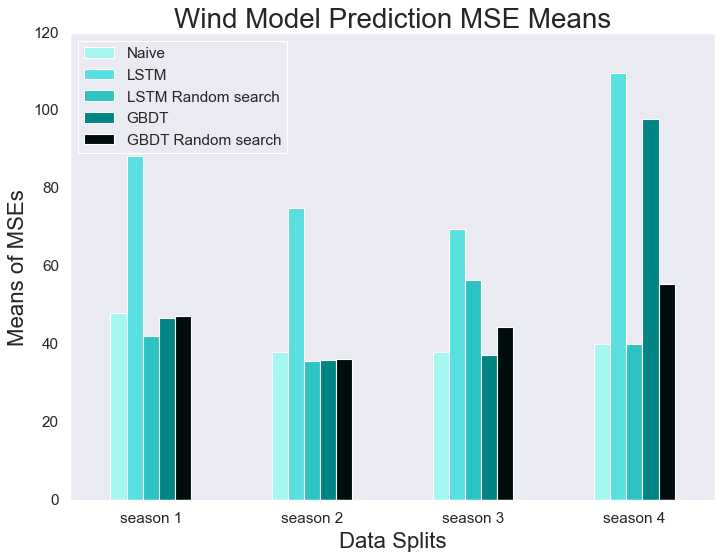

In [19]:
sns.set(rc={'figure.figsize':(10.4,7.3)},font_scale=1.25)
sns.set_style("dark")

df_MSEs[['Naive','LSTM','LSTM Random search','GBDT','GBDT Random search']].plot(kind="bar", color = ['#A5F7F2','#59DFDF','#2DC3C3','#008585','#010C0C'])
plt.xticks(rotation=0,horizontalalignment="center")
plt.title('Wind Model Prediction MSE Means',fontsize=25)
plt.xlabel("Data Splits",fontsize=20)
plt.ylabel("Means of MSEs",fontsize=20)
plt.savefig('WindMSEszoom.png')

In [20]:
Naive = computeSTDevery5(df1)
acf = computeSTDevery5(df2)
auto = computeSTDevery5(df3)
LSTM = computeSTDevery5(df4)
GBDT = computeSTDevery5(df5)
LSTM_rand = computeSTDevery5(df6)
GBDT_rand = computeSTDevery5(df7)

In [21]:
d = {'Naive':Naive,'ARIMA ACF':acf,'AUTO-ARIMA':auto,'LSTM':LSTM,'GBDT':GBDT,'LSTM Random search':LSTM_rand,'GBDT Random search':GBDT_rand}

df_MSEs = pd.DataFrame({k:pd.Series(v) for k,v in d.items()})
df_MSEs['seasons'] = ['season 1', 'season 2', 'season 3', 'season 4']
df_MSEs = df_MSEs.set_index('seasons')

In [22]:
df_MSEs.transpose()

seasons,season 1,season 2,season 3,season 4
Naive,186.118454,293.625965,293.625965,159.996219
ARIMA ACF,1964.700558,2236.503467,3592.704658,4136.473781
AUTO-ARIMA,1964.700558,2236.503467,3288.027383,4136.473781
LSTM,256.860843,336.886198,1184.930858,377.634882
GBDT,182.167070,259.895592,262.940509,206.024967
LSTM Random search,178.758270,274.338178,125.228671,141.779675
GBDT Random search,168.797247,257.525030,278.335353,130.893971


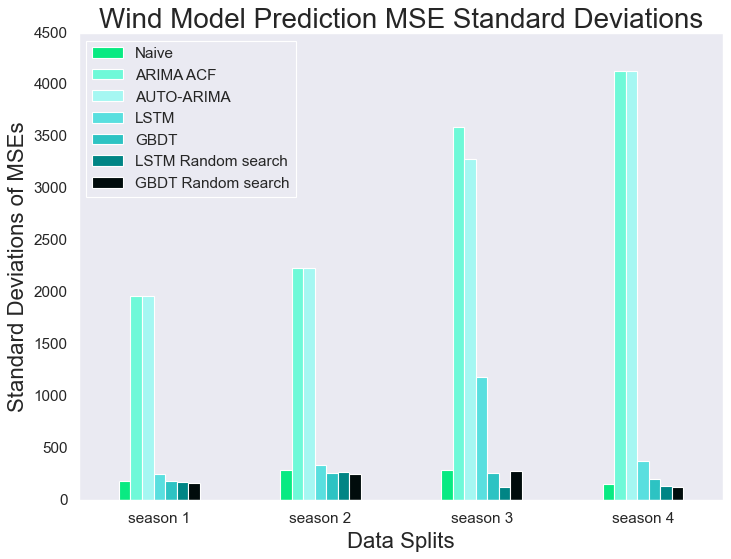

In [23]:
sns.set(rc={'figure.figsize':(10.4,7.3)},font_scale=1.25)
sns.set_style("dark")
df_MSEs.plot(kind="bar", color = ['#09EA82','#6FF9D8','#A5F7F2','#59DFDF','#2DC3C3','#008585','#010C0C'])
plt.xticks(rotation=0,horizontalalignment="center")
plt.title('Wind Model Prediction MSE Standard Deviations',fontsize=25)
plt.xlabel("Data Splits",fontsize=20)
plt.ylabel("Standard Deviations of MSEs",fontsize=20)
plt.savefig('WindSD.png')

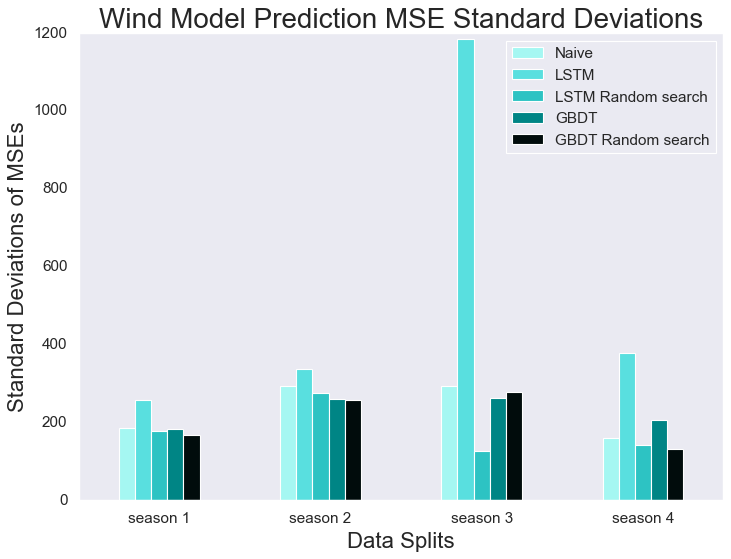

In [24]:
import seaborn as sns
sns.set(rc={'figure.figsize':(10.4,7.3)},font_scale=1.25)
sns.set_style("dark")

df_MSEs[['Naive','LSTM','LSTM Random search','GBDT','GBDT Random search']].plot(kind="bar", color = ['#A5F7F2','#59DFDF','#2DC3C3','#008585','#010C0C'])
plt.xticks(rotation=0,horizontalalignment="center")
plt.title('Wind Model Prediction MSE Standard Deviations',fontsize=25)
plt.xlabel("Data Splits",fontsize=20)
plt.ylabel("Standard Deviations of MSEs",fontsize=20)
plt.savefig('WindSD_zoom.png')